In [4]:
import stats
import time
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from math import inf
import numpy as np

stats.DB_PATH = '/home/aislab/Desktop'

In [5]:
maps = [map for map in stats.SingleRun(99).finalMaps['map'].iloc]

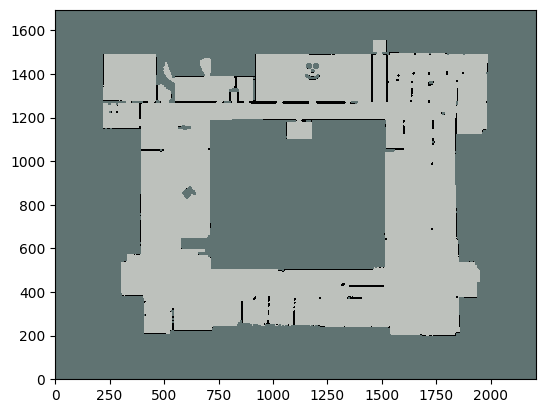

In [6]:
#plt.subplots(dpi=200)

get_size   = lambda map: (map['info']['height'], map['info']['width'])
get_origin = lambda map: map['info']['origin']['position']
get_res    = lambda map: map['info']['resolution']

min_x = min([get_origin(map)['x'] for map in maps])
min_y = min([get_origin(map)['y'] for map in maps])
max_x = max([get_origin(map)['x']+get_size(map)[1]*get_res(map) for map in maps])
max_y = max([get_origin(map)['y']+get_size(map)[0]*get_res(map) for map in maps])

h = round((max_y-min_y)/get_res(maps[0]))
w = round((max_x-min_x)/get_res(maps[0]))

img = np.zeros((h,w),dtype=np.int16)-1

for map in maps:
    res     = get_res(map) 
    left    = round((get_origin(map)['x'] - min_x)/res)
    right   = left + get_size(map)[1]
    bottom  = round((get_origin(map)['y'] - min_y)/res)
    up      = bottom + get_size(map)[0]
    section = img[bottom:up,left:right]
    img[bottom:up,left:right] = section * stats.get_map_img(map)
    img[bottom:up,left:right] = section * -1
    section[section>100] = 100
    section[section<-1]  = 100
    
stats.plot_map(img, plt.gca())
#img[img>100]

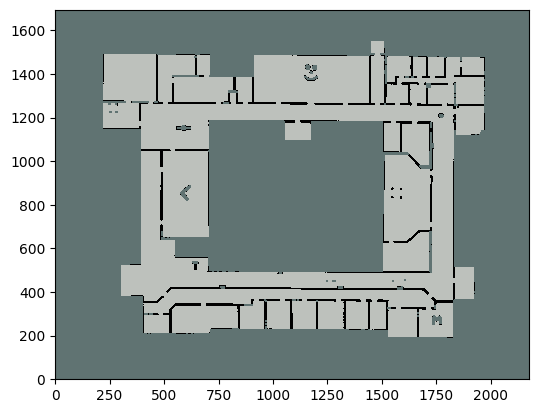

In [17]:
stats.plot_occ_grid(
    stats.MAPS['office_big'],
    plt.gca()
)

loop1	step1:0.08, step2:0.01
loop1	step1:0.06, step2:0.01
loop1	step1:0.06, step2:0.01
loop1	step1:0.06, step2:0.01
loop1	step1:0.04, step2:0.0
loop1	step1:0.03, step2:0.0
loop1	step1:0.03, step2:0.0
loop1	step1:0.07, step2:0.01


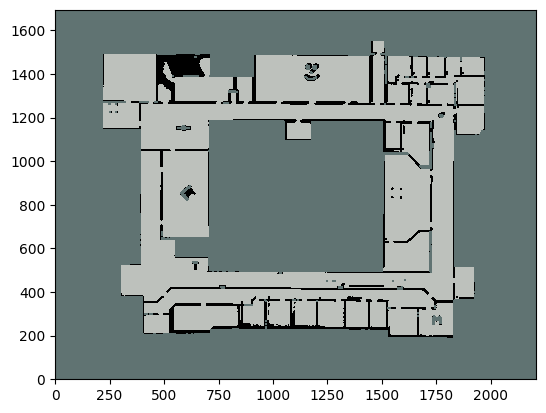

In [18]:
#plt.subplots(dpi=200)
real_map = stats.MAPS['office_big']

min_x = min([get_origin(map)['x'] for map in [real_map] + maps])
min_y = min([get_origin(map)['y'] for map in [real_map] + maps])
max_x = max([get_origin(map)['x']+get_size(map)[1]*get_res(map) for map in [real_map] + maps])
max_y = max([get_origin(map)['y']+get_size(map)[0]*get_res(map) for map in [real_map] + maps])

h = round((max_y-min_y)/get_res(maps[0]))
w = round((max_x-min_x)/get_res(maps[0]))

img = np.zeros((h,w),dtype=np.int16)-1

for idx, map in enumerate([real_map] + maps + [real_map]):
    now = time.time()
    res     = get_res(map) 
    left    = round((get_origin(map)['x'] - min_x)/res)
    right   = left + get_size(map)[1]
    bottom  = round((get_origin(map)['y'] - min_y)/res)
    up      = bottom + get_size(map)[0]
    section = img[bottom:up,left:right]
    map_img = stats.get_map_img(map)

    step1 = time.time()

    if idx==len(maps)+1:
        img[bottom:up,left:right] = section + map_img
        section[section==-2] = -1
        section[section==99] = 100
    else:
        img[bottom:up,left:right] = section * map_img
        if real_map and idx==0: img[img==0] = 100
        img[bottom:up,left:right] = section * -1
    section[section>100] = 100
    section[section<-1]  = 100

    step2 = time.time()
    print(f"loop1\tstep1:{round(step1-now,2)}, step2:{round(step2-step1,2)}")

stats.plot_map(img, plt.gca())

In [8]:
len(img)*len(img[0]) - len(img[img==-1]) - len(img[img==0]) - len(img[img==100])

0

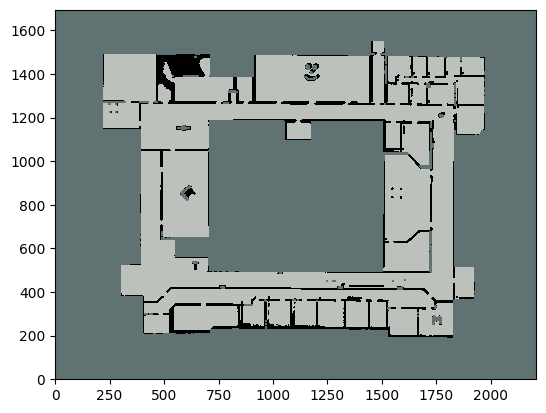

In [9]:
stats.plot_occ_grid(stats.SingleRun(99,real_map='office_big').get_final_map(old_method=False),plt.gca())

In [10]:
TS_office2_3 = stats.TestSet(
    {'my': [299,169,170,171,172,301,303,302,300,304],
     'el': [173,174,175,176,177,178,179,180,216,217]},
    'office_2'
)
TS_office2_5 = stats.TestSet(
    {'my': [128,129,161,163,164,165,240,241,243,305],
     'el': [132,133,134,140,144,137,144,289,293,291]},
    'office_2'
)
TS_office2_8 = stats.TestSet(
    {'my': [120,121,122,125,124,123,250,246,247,306],
     'el': [114,115,116,118,119,251,294,295,296,308]},
    'office_2'
)
TS_bigoffice_3 = stats.TestSet(
    {'my': [107,106,104,185,186,187,190,191,275,276],
     'el': [197,199,72,404,198,195,192,193,194,198]},
     'office_big'
)
TS_bigoffice_5 = stats.TestSet(
    {'my': [399,39,81,402,99,101,207,209,211,210],
     'el': [24,22,29,31,30,32,202,277,278,279]},
    'office_big'
)
TS_bigoffice_8 = stats.TestSet(
    {'my': [20,43,60,65,91,93,94,95,97,288],
     'el': [46,51,52,54,69,280,285,282,345,350]},
    'office_big'
)
TS_map23_3 = stats.TestSet(
    {'my': [212,213,214,158,157,159,334,354,348,344],
     'el': [145,215,324,326,327,330,331,338,340,349]},
    'map23'
)
TS_E13_3 = stats.TestSet(
    {'my': [359,440,363,441,445,446,448,382,375,383],
     'el': [407,357,358,361,362,365,366,367,368,406,408,409,410]},
    'e13'
)
TS_E40_3 = stats.TestSet(
    {'my': [419,422,426,429,432,436,438,472,475,480],
     'el': [389,391,415,444,452,453,462,464,465,466]},
    'e13'
)

In [11]:
TS_bigoffice_3.get_perc_areas()

107
106
104
185
186
187
190
191
275
276
197
199
72
404
198
195
192
193
194
198


{'my': [0.850019211823022,
  0.759997678418327,
  0.9161343314175386,
  0.7994586894377584,
  None,
  0.8052251750553396,
  0.7726576453137478,
  0.9773168246346264,
  0.9571095132686475,
  0.9823126332980933],
 'el': [0.8792468965375373,
  0.9468460651762014,
  0.8924571370636841,
  0.8048681216714506,
  1,
  1,
  0.9573108149706754,
  0.7485131959143101,
  1,
  1]}